/tmp/ipykernel_6081/1146893791.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


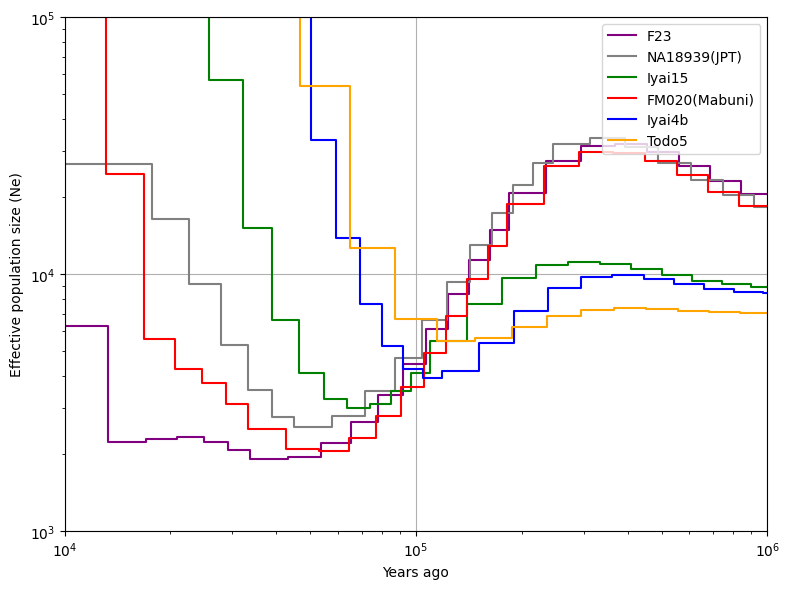

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for the mutation rate and generation time
mu = 1.25e-8
gen = 30

# Function to read and process MSMC2 data
def process_msmc2_data(sample_name):
    file_path = f'/home/mkato/hdd_data/data/2-msmc/{sample_name}/effective_population_size_file/{sample_name}.msmc2.final.txt'
    df = pd.read_csv(file_path, delimiter='\t')
    df['Years_ago'] = df['left_time_boundary'] / mu * gen
    df['Ne'] = (1 / df['lambda']) / (2 * mu)
    return df

# Read and process the data
df1 = process_msmc2_data('F23')
df2 = process_msmc2_data('NA18939')
df3 = process_msmc2_data('I15')
df4 = process_msmc2_data('FM020_sorted')
df5 = process_msmc2_data('Iyai4b_Dra')
df6 = process_msmc2_data('Todo5_Dra')

# Plotting both datasets on the same graph
plt.figure(figsize=(8, 6))
plt.step(df1['Years_ago'], df1['Ne'], where='post', color='purple', label='F23')
plt.step(df2['Years_ago'], df2['Ne'], where='post', color='gray', label='NA18939(JPT)')
plt.step(df3['Years_ago'], df3['Ne'], where='post', color='green', label='Iyai15')
plt.step(df4['Years_ago'], df4['Ne'], where='post', color='red', label='FM020(Mabuni)')
plt.step(df5['Years_ago'], df5['Ne'], where='post', color='blue', label='Iyai4b')
plt.step(df6['Years_ago'], df6['Ne'], where='post', color='orange', label='Todo5')

# Set log scale for both axes and axis limits
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**4, 10**6)
plt.ylim(10**3, 10**5)

# Adding labels and title
plt.xlabel('Years ago')
plt.ylabel('Effective population size (Ne)')
#plt.title('Effective Population Size (Ne)')

# Adding the legend
plt.legend(loc='upper right')

# Show the grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


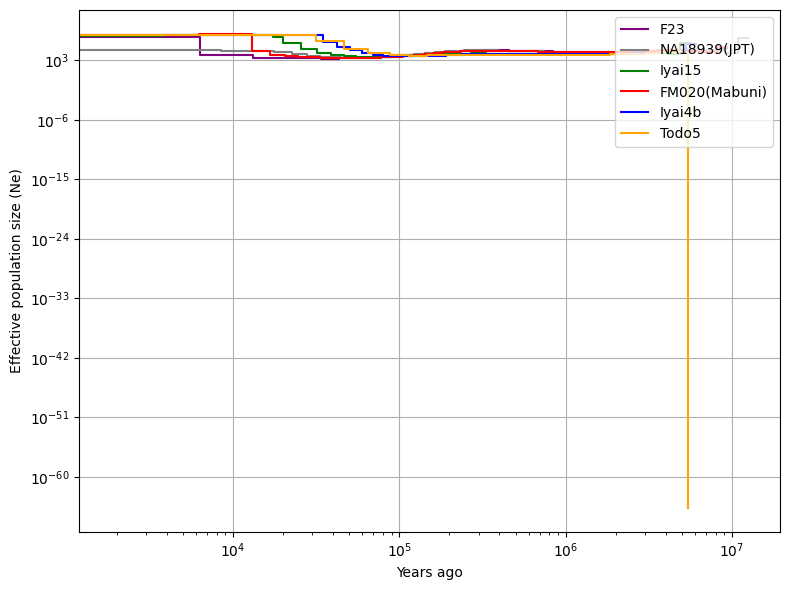

In [2]:
# Plotting both datasets on the same graph
plt.figure(figsize=(8, 6))
plt.step(df1['Years_ago'], df1['Ne'], where='post', color='purple', label='F23')
plt.step(df2['Years_ago'], df2['Ne'], where='post', color='gray', label='NA18939(JPT)')
plt.step(df3['Years_ago'], df3['Ne'], where='post', color='green', label='Iyai15')
plt.step(df4['Years_ago'], df4['Ne'], where='post', color='red', label='FM020(Mabuni)')
plt.step(df5['Years_ago'], df5['Ne'], where='post', color='blue', label='Iyai4b')
plt.step(df6['Years_ago'], df6['Ne'], where='post', color='orange', label='Todo5')

# Set log scale for both axes and axis limits
plt.xscale('log')
plt.yscale('log')

# Adding labels and title
plt.xlabel('Years ago')
plt.ylabel('Effective population size (Ne)')
#plt.title('Effective Population Size (Ne)')
#plt.ylim(10**3, 10**5)

# Adding the legend
plt.legend(loc='upper right')

# Show the grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

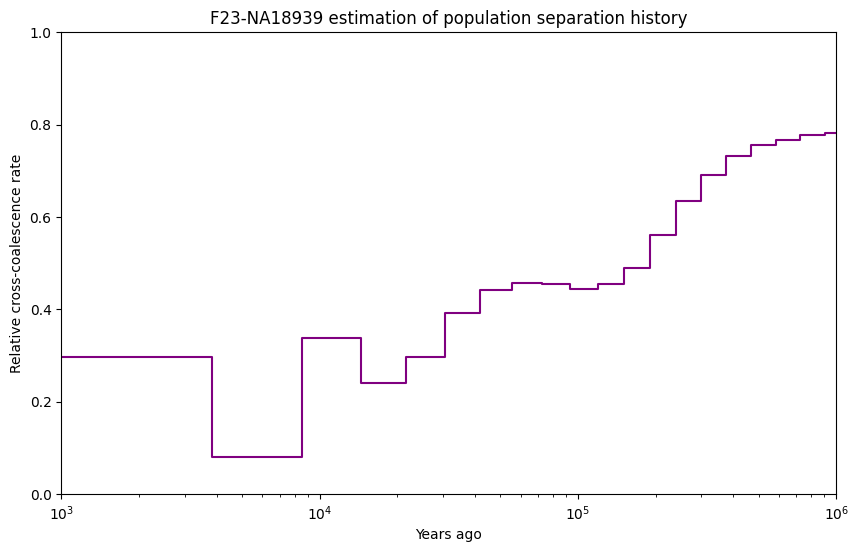

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 定数の設定
mu = 1.25e-8
gen = 30

sample1 = "F23"
sample2 = "NA18939"

file_path = f'/home/mkato/hdd_data/data/2-msmc/{sample1}_{sample2}/separate_history/{sample1}_{sample2}.combined.msmc2.final.txt'
# データの読み込み
crossPopDat = pd.read_csv(file_path, sep="\t")

# 年代と相対的交差結合率の計算
years_ago = crossPopDat['left_time_boundary'] / mu * gen
relative_cross_coalescence_rate = 2 * crossPopDat['lambda_01'] / (crossPopDat['lambda_00'] + crossPopDat['lambda_11'])

# プロットの作成
plt.figure(figsize=(10, 6))
plt.plot(years_ago, relative_cross_coalescence_rate, drawstyle='steps-post', color='purple')
file_path = f'/home/mkato/hdd_data/data/2-msmc/{sample1}_{sample2}/separate_history/{sample1}_{sample2}.combined.msmc2.final.txt'
# データの読み込み
crossPopDat = pd.read_csv(file_path, sep="\t")

# 年代と相対的交差結合率の計算
years_ago = crossPopDat['left_time_boundary'] / mu * gen
relative_cross_coalescence_rate = 2 * crossPopDat['lambda_01'] / (crossPopDat['lambda_00'] + crossPopDat['lambda_11'])
#plt.plot(years_ago, relative_cross_coalescence_rate, drawstyle='steps-post')

plt.xscale('log')
plt.xlim(10**3, 10**6)
plt.ylim(0, 1)
plt.xlabel('Years ago')
plt.ylabel('Relative cross-coalescence rate')
plt.title(f'{sample1}-{sample2} estimation of population separation history')
plt.show()


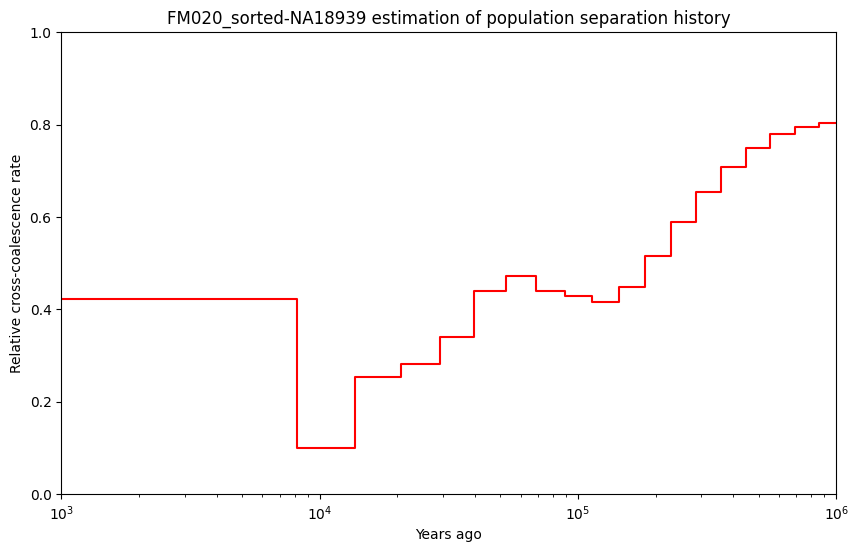

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 定数の設定
mu = 1.25e-8
gen = 30

sample1 = "FM020_sorted"
sample2 = "NA18939"

file_path = f'/home/mkato/hdd_data/data/2-msmc/{sample1}_{sample2}/separate_history/{sample1}_{sample2}.combined.msmc2.final.txt'
# データの読み込み
crossPopDat = pd.read_csv(file_path, sep="\t")

# 年代と相対的交差結合率の計算
years_ago = crossPopDat['left_time_boundary'] / mu * gen
relative_cross_coalescence_rate = 2 * crossPopDat['lambda_01'] / (crossPopDat['lambda_00'] + crossPopDat['lambda_11'])

# プロットの作成
plt.figure(figsize=(10, 6))
plt.plot(years_ago, relative_cross_coalescence_rate, drawstyle='steps-post', color='red')
plt.xscale('log')
plt.xlim(10**3, 10**6)
plt.ylim(0, 1)
plt.xlabel('Years ago')
plt.ylabel('Relative cross-coalescence rate')
plt.title(f'{sample1}-{sample2} estimation of population separation history')
plt.show()


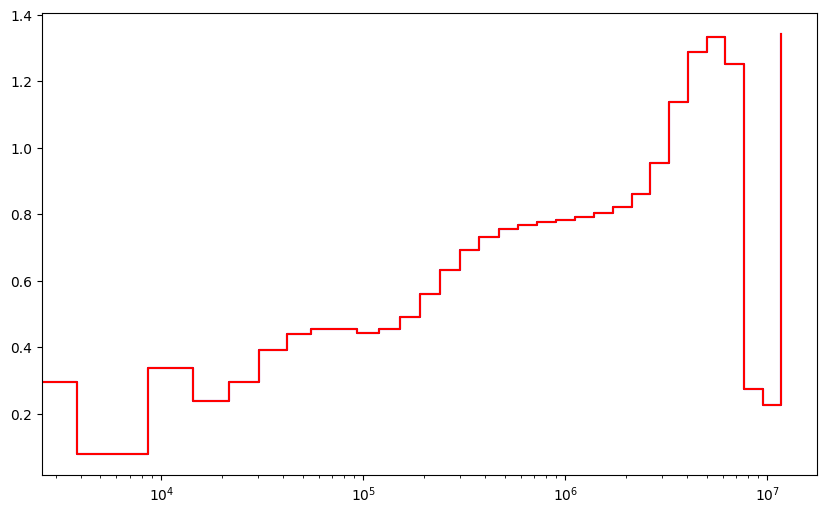

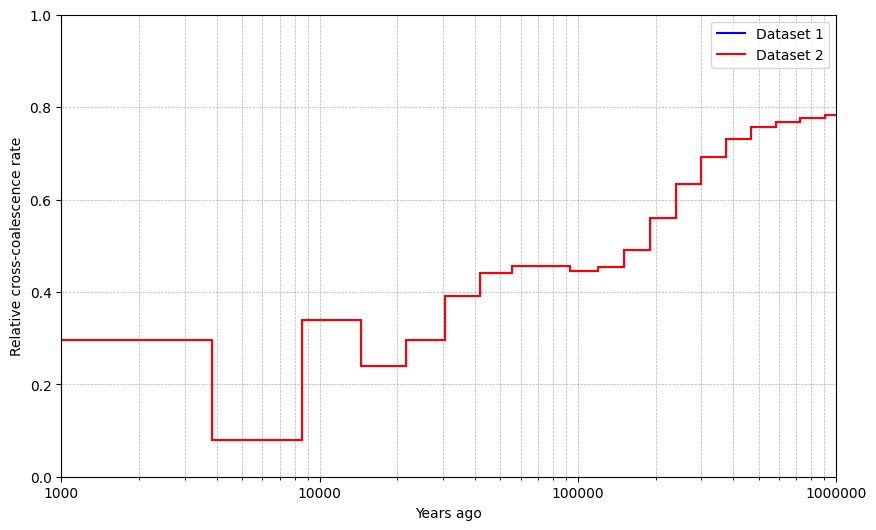

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 定数の設定
mu = 1.25e-8
gen = 30

# ファイル1のデータを読み込み
data1 = pd.read_csv(f"/home/mkato/hdd_data/data/2-msmc/{sample1}_{sample2}/separate_history/{sample1}_{sample2}.combined.msmc2.final.txt", sep="\t")
years_ago1 = data1['left_time_boundary'] / mu * gen
relative_rate1 = 2 * data1['lambda_01'] / (data1['lambda_00'] + data1['lambda_11'])

# ファイル2のデータを読み込み
data2 = pd.read_csv(f"/home/mkato/hdd_data/data/2-msmc/{sample1}_{sample2}/separate_history/{sample1}_{sample2}.combined.msmc2.final.txt", sep="\t")
years_ago2 = data2['left_time_boundary'] / mu * gen
relative_rate2 = 2 * data2['lambda_01'] / (data2['lambda_00'] + data2['lambda_11'])

# プロットの作成
plt.figure(figsize=(10, 6))

# データ1をプロット
plt.semilogx(years_ago1, relative_rate1, drawstyle='steps-post', color='blue', label='Dataset 1')

# データ2をプロット
plt.semilogx(years_ago2, relative_rate2, drawstyle='steps-post', color='red', label='Dataset 2')

plt.xlim(10**3, 10**6)  # X軸の範囲を10^3から10^6に設定
plt.ylim(0, 1)  # Y軸の範囲を0から1に設定

# X軸の目盛りをカスタマイズ
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

plt.xlabel('Years ago')
plt.ylabel('Relative cross-coalescence rate')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()  # 凡例を追加
plt.show()


Data1 head:
    time_index  left_time_boundary  right_time_boundary    lambda_00  \
0           0            0.000000             0.000002     12.84430   
1           1            0.000002             0.000004   2557.09058   
2           2            0.000004             0.000006   7540.52400   
3           3            0.000006             0.000009  17736.73000   
4           4            0.000009             0.000013  17789.72000   

   lambda_01  lambda_11  
0     139.48    929.618  
1     139.48    929.618  
2    1530.54   1493.440  
3    2360.97   1972.885  
4    3362.27   4932.605  
Data2 head:
    time_index  left_time_boundary  right_time_boundary     lambda_00  \
0           0            0.000000             0.000002      4.947850   
1           1            0.000002             0.000003      4.449094   
2           2            0.000003             0.000006    167.091864   
3           3            0.000006             0.000009   4406.640000   
4           4            0.0000

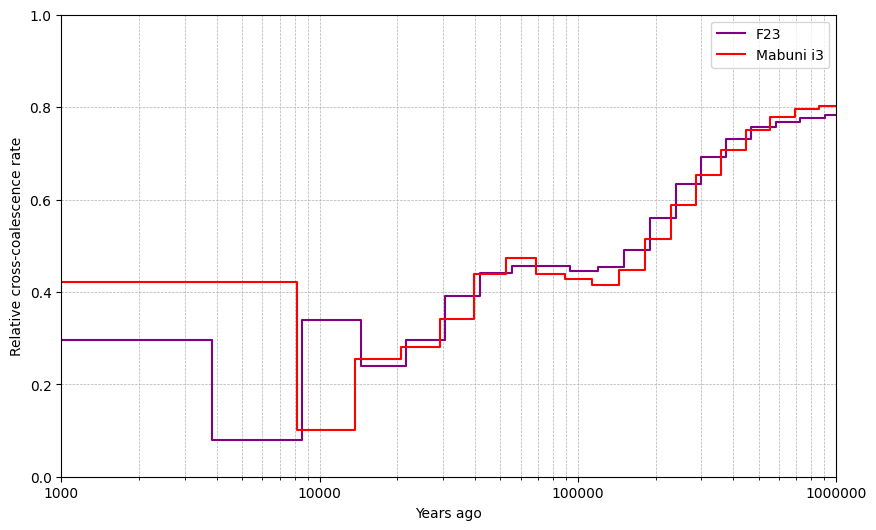

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 定数の設定
mu = 1.25e-8
gen = 30
sample1 = "F23"
sample2 = "NA18939"

file1 = f'/home/mkato/hdd_data/data/2-msmc/{sample1}_{sample2}/separate_history/{sample1}_{sample2}.combined.msmc2.final.txt'

sample1 = "FM020_sorted"
sample2 = "NA18939"

file2 = f'/home/mkato/hdd_data/data/2-msmc/{sample1}_{sample2}/separate_history/{sample1}_{sample2}.combined.msmc2.final.txt'


# ファイル1のデータを読み込み、先頭を表示
data1 = pd.read_csv(file1, sep="\t")
print("Data1 head:\n", data1.head())  # デバッグのためにデータの先頭を表示

# ファイル2のデータを読み込み、先頭を表示
data2 = pd.read_csv(file2, sep="\t")
print("Data2 head:\n", data2.head())  # デバッグのためにデータの先頭を表示

# 年代と相対的交差結合率の計算
years_ago1 = data1['left_time_boundary'] / mu * gen
relative_rate1 = 2 * data1['lambda_01'] / (data1['lambda_00'] + data1['lambda_11'])
years_ago2 = data2['left_time_boundary'] / mu * gen
relative_rate2 = 2 * data2['lambda_01'] / (data2['lambda_00'] + data2['lambda_11'])

# プロットの作成
plt.figure(figsize=(10, 6))

# データ1をプロット
plt.semilogx(years_ago1, relative_rate1, drawstyle='steps-post', color='purple', label="F23")

# データ2をプロット
plt.semilogx(years_ago2, relative_rate2, drawstyle='steps-post', color='red', label="Mabuni i3")

plt.xlim(10**3, 10**6)  # X軸の範囲を設定
plt.ylim(0, 1)  # Y軸の範囲を設定

# X軸の目盛りをカスタマイズ
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

plt.xlabel('Years ago')
plt.ylabel('Relative cross-coalescence rate')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()  # 凡例を追加
plt.show()
